#Libraries 

In [49]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [42]:
data1 = pd.read_excel('/Users/Carolina/Desktop/MESTRADO/Applied Economic Analysis/python assignment/dados.xlsx')

In [43]:
#Creating dummies for each country. Austria works as the baseline country.
country_dummies = pd.get_dummies(data1.Country, prefix='Country').iloc[:, 1:]

In [44]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data1, country_dummies], axis=1)
data.head()

,Country,Female,Age,Years_of_education,Body_Mass_Index,Body_Mass_Index_categorized,Income_percentiles,Country_Belgium,Country_Denmark,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Netherlands,Country_Spain,Country_Sweden,Country_Switzerland
0,Austria,1,51.7,3,30.46,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austria,0,58.8,8,28.08,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austria,1,73.5,10,30.04,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Austria,0,56.4,8,25.05,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Austria,1,53.1,8,30.71,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# print the shape of the DataFrame
data.shape

(19050, 17)

There are 19050 observations

In [51]:
data1.describe()

,Female,Age,Years_of_education,Body_Mass_Index,Body_Mass_Index_categorized,Income_percentiles
count,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000
mean,0.544042,64.813727,10.432336,26.370163,2.754121,5.562100
std,0.498070,10.674345,4.381017,4.349791,0.749483,2.875303
min,0.000000,32.000000,0.000000,12.480000,1.000000,1.000000
25%,0.000000,56.300000,7.000000,23.502500,2.000000,3.000000
50%,1.000000,63.300000,11.000000,25.880000,3.000000,6.000000
75%,1.000000,72.400000,13.000000,28.680000,3.000000,8.000000
max,1.000000,104.300000,25.000000,69.920000,4.000000,10.000000


In [78]:
#Creating boxplot

import numpy as np
# list with BMIs in category 1,2,3,4
cat1 = []
cat2 = []
cat3 = []
cat4 = []
#condition
cat1 = data['Body_Mass_Index'].where(data['Body_Mass_Index_categorized']==1,)
cat2 = data['Body_Mass_Index'].where(data['Body_Mass_Index_categorized']==2,)
cat3 = data['Body_Mass_Index'].where(data['Body_Mass_Index_categorized']==3,)
cat4 = data['Body_Mass_Index'].where(data['Body_Mass_Index_categorized']==4,)
#deleting NAN
cat1 = cat1[~np.isnan(cat1)]
cat2 = cat2[~np.isnan(cat2)]
cat3 = cat3[~np.isnan(cat3)]
cat4 = cat4[~np.isnan(cat4)]

In [79]:
data_to_plot = [cat1,cat2,cat3,cat4]

In [76]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

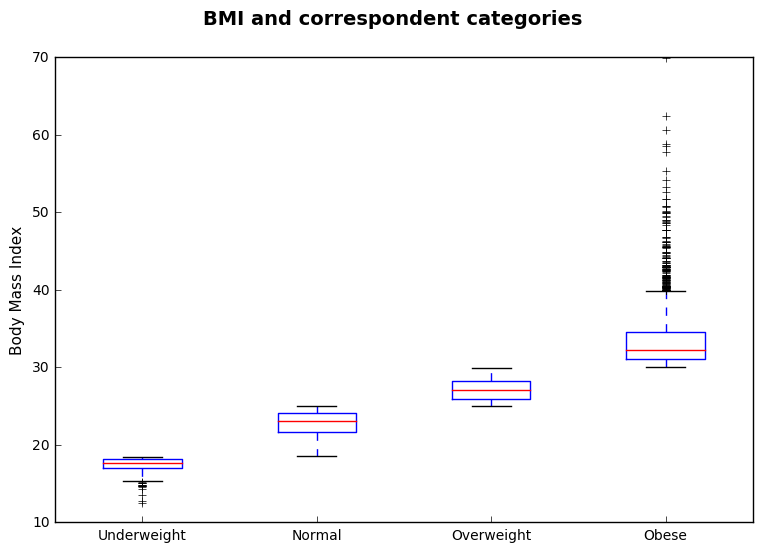

In [89]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

fig.suptitle('BMI and correspondent categories', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Underweight', 'Normal', 'Overweight', 'Obese'])
ax.set_ylabel('Body Mass Index', fontsize=11)

# Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

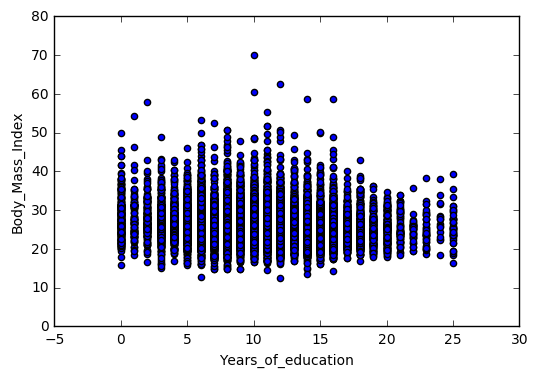

In [92]:
# visualize the relationship between the features and the response using scatterplots
fig2 = data.plot(kind='scatter', x='Years_of_education', y='Body_Mass_Index')

In [50]:
lm = smf.ols(formula='Body_Mass_Index ~ Years_of_education + Female + Age + Income_percentiles + Country_Belgium + Country_Denmark +Country_France +Country_Germany +Country_Greece +Country_Italy +Country_Netherlands +Country_Spain +Country_Sweden +Country_Switzerland' , data=data).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Body_Mass_Index   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     65.09
Date:                Sun, 15 Jan 2017   Prob (F-statistic):          5.03e-181
Time:                        17:42:05   Log-Likelihood:                -54591.
No. Observations:               19050   AIC:                         1.092e+05
Df Residuals:                   19035   BIC:                         1.093e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              31.1153    